In [63]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [64]:
# Load the data into a Pandas dataframe
df = pd.read_csv('Data/kurla_cleaned.csv')
df = df.drop(columns=["Date", 'RH', 'WS', 'WD', 'AT'])

In [65]:
df.head()

,Unnamed: 0,PM2.5,PM10,NO,NO2,SO2,CO,Ozone
0,0,137.96,272.0,7.97,129.990000,73.270,1.882128,3.470
1,1,111.31,272.0,7.97,94.086667,67.162,1.882128,3.566
2,2,49.00,272.0,7.97,58.183333,61.054,1.496000,3.662
3,3,32.83,272.0,7.97,22.280000,54.946,1.084000,3.758
4,4,50.19,272.0,17.54,42.045000,48.838,0.672000,3.854


In [66]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2)

# Separate the target variables from the predictors
targets = ['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone']
X_train = train_data.drop(columns=targets)
y_train = train_data[targets]
X_test = test_data.drop(columns=targets)
y_test = test_data[targets]
display(X_train)
display(y_test)

,Unnamed: 0
1236,1236
5608,5608
7908,7908
15043,15043
17217,17217
...,...
14051,14051
5503,5503
15769,15769
10699,10699


,PM2.5,PM10,NO,NO2,SO2,CO,Ozone
9277,28.648387,197.376774,23.774946,46.002258,39.077312,0.273978,63.036774
16639,42.790000,252.710000,29.370000,38.990000,12.170000,1.320000,37.920000
13500,36.530000,42.420000,27.340000,20.530000,12.520000,0.200000,37.130000
7277,141.830000,201.670000,15.980000,60.030000,19.570000,0.980000,5.980000
2197,18.480000,23.000000,21.230000,29.114286,6.820000,0.170000,27.730000
...,...,...,...,...,...,...,...
2145,16.878000,69.472000,40.288000,23.862000,11.346000,0.190000,25.744000
10533,10.320000,90.116279,91.670000,3.690000,13.850000,0.060000,40.550000
6419,111.270000,178.460000,7.400000,39.380000,51.350000,0.860000,85.840000
8242,71.030000,217.470000,38.990000,106.240000,0.150000,1.190000,70.520000


In [67]:
# Create an XGBoost model and train it on the training data
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 1000)
train_errors, test_errors = [], []
model.fit(X_train, y_train)

train_preds = model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_preds = model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
train_errors.append(train_rmse)
test_errors.append(test_rmse)
print(f'Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}')

Train RMSE: 3.77, Test RMSE: 14.01


In [68]:
df.tail()

,Unnamed: 0,PM2.5,PM10,NO,NO2,SO2,CO,Ozone
17559,17559,14.93,217.88,10.18,25.75,25.55,0.33,49.06
17560,17560,17.07,250.22,12.90,24.92,25.54,0.26,44.69
17561,17561,12.36,236.92,10.55,22.70,25.56,0.23,48.02
17562,17562,13.25,189.68,10.98,24.55,25.55,0.25,43.67
17563,17563,13.25,189.68,10.98,24.55,25.55,0.25,43.67


In [69]:
new_data = [i for i in range(17564,17763)]
# new_data
# create a new DataFrame with the new data
new_df = pd.DataFrame({'Unnamed: 0': new_data})

# concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, new_df], ignore_index=True, axis=0)
df.tail()

,Unnamed: 0,PM2.5,PM10,NO,NO2,SO2,CO,Ozone
17758,17758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17759,17759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17760,17760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17761,17761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17762,17762,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# new_df
test_preds = model.predict(new_df)
# df.columns[:7]
test_preds[0:5]

array([[ 13.34182   , 190.86127   ,  11.109054  ,  24.615273  ,
         25.528524  ,   0.24928856,  43.891724  ],
       [ 13.34182   , 190.86127   ,  11.109054  ,  24.615273  ,
         25.528524  ,   0.24928856,  43.891724  ],
       [ 13.34182   , 190.86127   ,  11.109054  ,  24.615273  ,
         25.528524  ,   0.24928856,  43.891724  ],
       [ 13.34182   , 190.86127   ,  11.109054  ,  24.615273  ,
         25.528524  ,   0.24928856,  43.891724  ],
       [ 13.34182   , 190.86127   ,  11.109054  ,  24.615273  ,
         25.528524  ,   0.24928856,  43.891724  ]], dtype=float32)

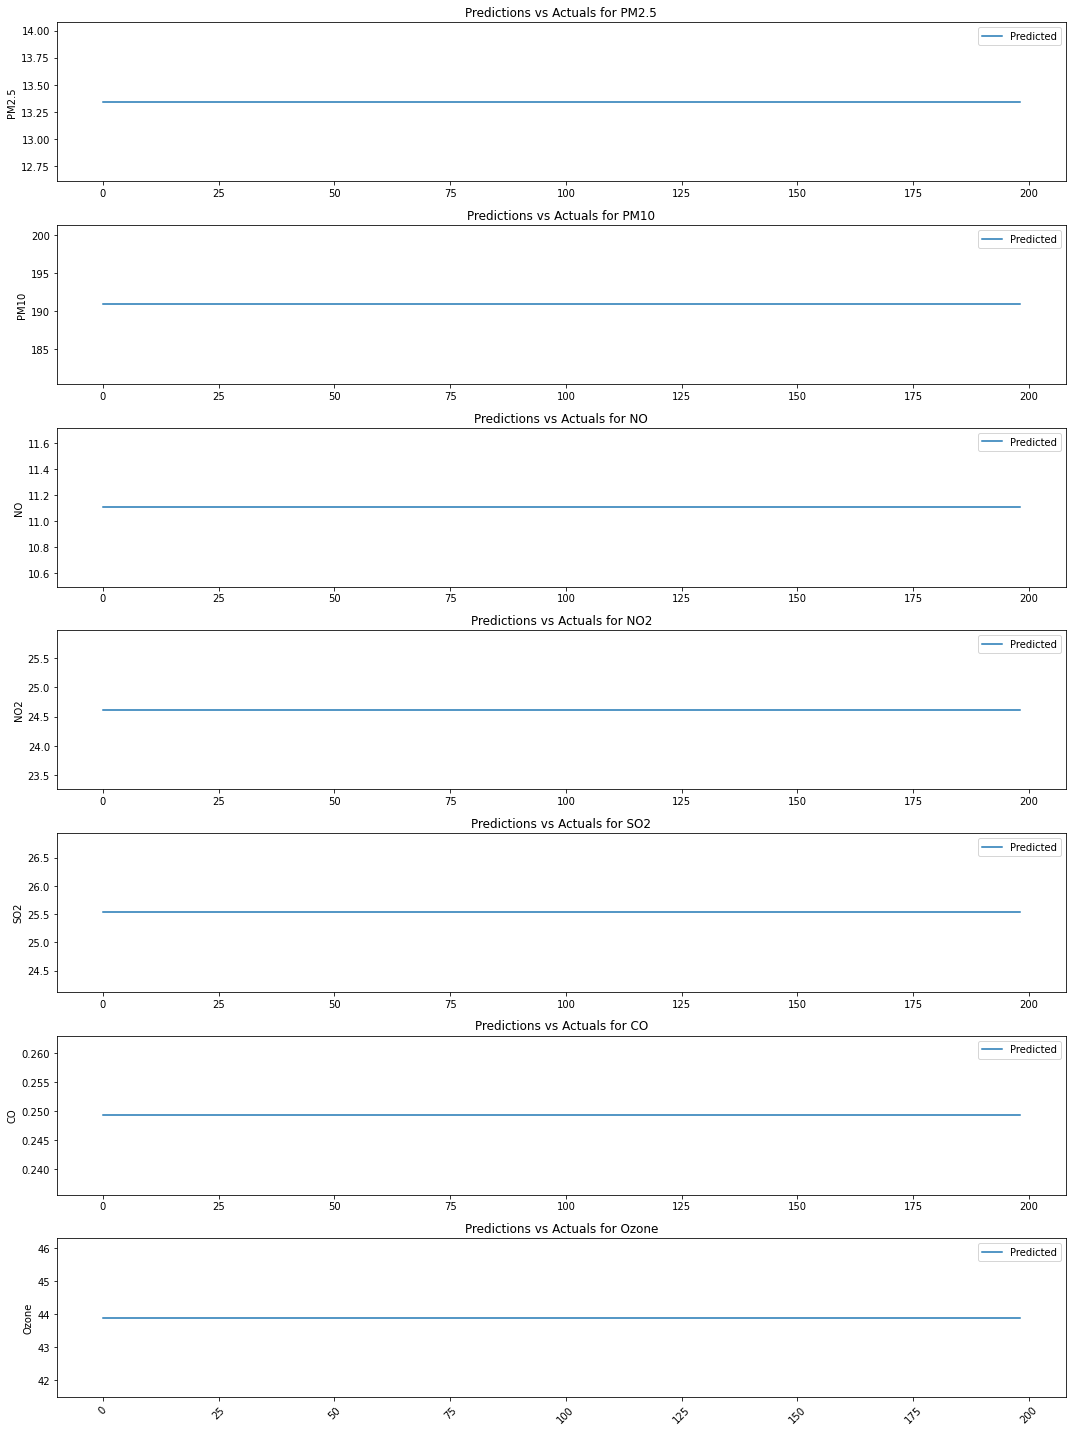

In [71]:
test_preds_df = pd.DataFrame(test_preds, columns=df.columns[1:])
test_preds_df
# future_preds = model.predict(test_preds_df.drop(columns=targets))
# future_preds = model.predict(test_preds.drop(columns=targets))
# future_preds_df = pd.DataFrame(future_preds, index=(17564,17763), columns=targets)

# Visualize the predictions on a single graph with proper dates on the x-axis
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 20))
for i, target in enumerate(targets):
    axes[i].plot(test_preds_df.index, test_preds_df[target], label='Predicted')
    # axes[i].plot(future_preds_df.index, last_month_data[target], label='Actual')
    axes[i].set_title(f"Predictions vs Actuals for {target}")
    axes[i].set_ylabel(target)
    axes[i].legend()
plt.xticks(rotation=45)
plt.tight_layout()